## Load Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#import seaborn as sns; sns.set()
np.random.seed(1)
#Gamma = 10

In [2]:
Data = pd.read_excel('data2.xlsx',header=None)
Data = Data.dropna(axis='columns') 
X = Data.iloc[1:,6:25]
Y = Data.iloc[1:,[25]]

In [3]:
#import seaborn as sns; sns.set(style="ticks", color_codes=True,font_scale = 1.5)
#plt.figure(figsize=(18,12))
#cor = Data.iloc[1:,6:27].corr()
#ax = sns.heatmap(cor, cmap='coolwarm', square=True,  linewidths=1, linecolor='black')

# Feature Selection

In [4]:
#Using Pearson Correlation
#plt.figure(figsize=(18,12))
#cor = Data.iloc[1:,6:27].corr()
#sns.heatmap(cor,annot=True, vmin=-1, vmax=1, center= 0, square=False,cbar=False, linewidths=1, linecolor='black',fmt='.1g', cmap='coolwarm')
#plt.show()

In [5]:
#Correlation with output variable
#cor = Data.iloc[1:,6:27].corr()
#cor_target = abs(cor[25])
#Selecting highly correlated features
#relevant_features = cor_target[cor_target>0.2]
#relevant_features

In [6]:
#import seaborn as sns; sns.set(style="ticks", color_codes=True,font_scale = 1.5)
#sns_plot = sns.pairplot(Datda.iloc[1:,[6,7,9,15,16, 25]], palette="husl", size=3.5, dropna=True)

## Normalization

In [7]:
#X = Data2.iloc[1:,6:24]
X = Data.iloc[1:,[7,9]]

Y = Data.iloc[1:,[25]]

In [8]:
X = X.to_numpy() #convert data frame to numpy array
Y = Y.to_numpy()

print(X.shape, Y.shape)

(812, 2) (812, 1)


In [9]:
# data normalization 

#normalization to gaussian distribution
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler() # (x - u) / s
#X = sc.fit_transform(X)

# data normalization, normalization to [0 1] range
X_Norm = np.empty_like(X)
for i in range(X.shape[1]):
    data_ = X[:,i]
    X_Norm[:,i] = (data_-np.amin(data_))/(np.amax(data_)-np.amin(data_)) 
    
# normalize Y data
Y_Min = np.amin(Y)
Y_Max = np.amax(Y)
Y_Norm = (Y-Y_Min)/(Y_Max-Y_Min)

## Split, Train, Test

In [10]:
Gamma = 30
# prepare variables and target

index = np.arange(len(Y))
np.random.shuffle(index) #disorder the original data

m = np.ceil(0.7*len(Y)) # 70% for training and 30% for testing
m = int(m) #covert float type to int type
X_Train = X_Norm[index[:m]]
Y_Train = Y_Norm[index[:m]]


X_Test = X_Norm[index[m:]]
Y_Test = Y_Norm[index[m:]]
Y_Train = Y_Train.reshape([Y_Train.shape[0],])
Y 
# kernel transformation
import sklearn.metrics.pairwise as pw
X_Train_Kernel = pw.rbf_kernel(X_Train, X_Train, gamma = Gamma)
X_Test_Kernel = pw.rbf_kernel(X_Test, X_Train, gamma = Gamma)

In [11]:

# define loss function, Mean Square Error (MSE) + margin

def cost_function(X, Y, B):
    J = np.sum((X.dot(B)-Y)**2)/(2*len(Y))+ lamda * B.dot(B)  
    return J

In [12]:

# create iterative gradient descent training

def gradient_descent(X, Y, B, alpha, lamda, iterations):
    cost_history = np.zeros(iterations)
    
    for iteration in range(iterations):
        loss = X.dot(B) - Y
        gradient = X.T.dot(loss)/len(Y) + 2* lamda *B
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
    
    return B, cost_history

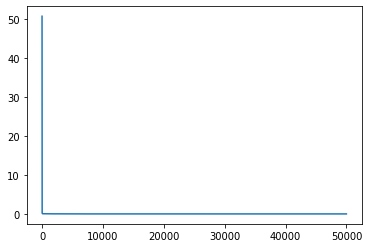

In [13]:
# training

B = np.random.random(X_Train_Kernel.shape[1]) # Initial Coefficients
alpha = 0.1 #learning rate
iter_ = 50000
lamda =  0.001 #1/iter_ #balancing coefficient
newB, cost_history = gradient_descent(X_Train_Kernel, Y_Train, B, alpha, lamda, iter_)
plt.plot(np.arange(iter_), cost_history)

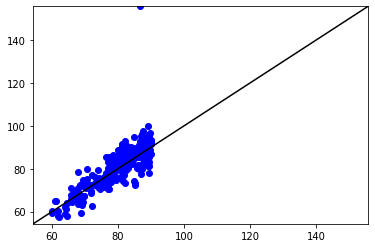

In [14]:
# testing 
y_predict = X_Test_Kernel.dot(newB)
y_predicted = y_predict * (Y_Max - Y_Min) + Y_Min
Y_Test = Y_Test * (Y_Max - Y_Min) + Y_Min
plt.scatter(y_predicted, Y_Test, c = 'b',marker = 'o')
plt.xlim(Y_Min, Y_Max)
plt.ylim(Y_Min, Y_Max)
plt.plot([Y_Min, Y_Max],[Y_Min, Y_Max],'k-')

In [15]:
y_predicted = y_predicted.reshape([y_predicted.shape[0],1])
# performance evaluation
# performance evaluation
def r2(y_predicted,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_predicted-y)**2)
    r2 = 1-(ssr/sst)
    return(r2)
def rmse(y_predicted,y):
    ssr = np.sum((y_predicted-y)**2)
    rmse= (ssr/len(y))**0.5
    return(rmse)
print(rmse(y_predicted, Y_Test),r2(y_predicted, Y_Test))

6.389536285645955 0.6348591172227351
